## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

## 17 Flowers Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [3]:
path_train = "/content/drive/MyDrive/Dataset/Flowers/Train"
path_test = "/content/drive/MyDrive/Dataset/Flowers/Test"
Train_images = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299),
    subset = "training"
)
Val_images = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299),
    subset = "validation"
)
Test_images = image_generator_test.flow_from_directory(
    path_test,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299)
)

Found 884 images belonging to 17 classes.
Found 204 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


# Model
## Transfer Learning

## Xception

In [ ]:
base_model = Xception(weights="imagenet",include_top=False,input_shape=(299,299,3),pooling="avg")
base_model.trainable = False

In [5]:
model = Sequential()
model.add(base_model)
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(17,activation="softmax"))

In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("Flowers.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [7]:
history = model.fit(Train_images,
                    epochs=10,
                    validation_data=Val_images,
                    callbacks=[checkpoint])

Epoch 1/10
28/28 [==============================] - 741s 26s/step - loss: 2.1541 - accuracy: 0.3518 - val_loss: 1.1466 - val_accuracy: 0.7696
Epoch 2/10
28/28 [==============================] - 302s 11s/step - loss: 1.0863 - accuracy: 0.6663 - val_loss: 0.7039 - val_accuracy: 0.8137
Epoch 3/10
28/28 [==============================] - 296s 11s/step - loss: 0.7176 - accuracy: 0.7964 - val_loss: 0.4695 - val_accuracy: 0.8725
Epoch 4/10
28/28 [==============================] - 294s 11s/step - loss: 0.5450 - accuracy: 0.8281 - val_loss: 0.3525 - val_accuracy: 0.8824
Epoch 5/10
28/28 [==============================] - 295s 11s/step - loss: 0.4247 - accuracy: 0.8676 - val_loss: 0.3859 - val_accuracy: 0.8971
Epoch 6/10
28/28 [==============================] - 294s 11s/step - loss: 0.3642 - accuracy: 0.8835 - val_loss: 0.3012 - val_accuracy: 0.9069
Epoch 7/10
28/28 [==============================] - 296s 11s/step - loss: 0.2479 - accuracy: 0.9287 - val_loss: 0.3152 - val_accuracy: 0.9020
Epoch 

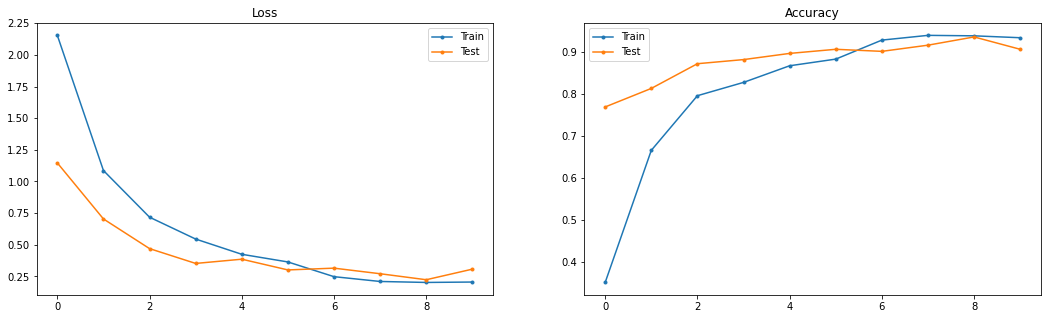

In [8]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [9]:
model.evaluate(Test_images)

9/9 [==============================] - 162s 19s/step - loss: 0.4473 - accuracy: 0.8603


[0.4473029375076294, 0.8602941036224365]